#MODEL FOR DENSIFICATION

##LOADING THE DATASET

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import joblib
joblib.__version__

'1.3.2'

In [ ]:
import string
import pandas as pd
df = pd.read_csv("/test file.csv")
pd.options.display.max_rows = 20
df

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3),Density
0,Al-50Si,950,0.11,330,0.06,52.63,2.44
1,Al-50Si,950,0.15,340,0.06,39.77,2.48
2,Al-50Si,1150,0.11,350,0.06,46.11,2.47
3,Al-50Si,1250,0.12,350,0.06,38.89,2.47
4,Al-50Si,1350,0.13,350,0.06,33.24,2.46
...,...,...,...,...,...,...,...
235,316L,750,0.12,175,0.03,64.81,7.98
236,316L,1200,0.06,70,0.02,48.61,7.50
237,316L,700,0.06,130,0.02,154.76,7.98
238,316L,1200,0.06,70,0.02,48.61,7.53


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
output= df['Density']


In [ ]:
input_train=df.drop(["Density"], axis=1)
input_train

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
0,Al-50Si,950,0.11,330,0.06,52.63
1,Al-50Si,950,0.15,340,0.06,39.77
2,Al-50Si,1150,0.11,350,0.06,46.11
3,Al-50Si,1250,0.12,350,0.06,38.89
4,Al-50Si,1350,0.13,350,0.06,33.24
...,...,...,...,...,...,...
235,316L,750,0.12,175,0.03,64.81
236,316L,1200,0.06,70,0.02,48.61
237,316L,700,0.06,130,0.02,154.76
238,316L,1200,0.06,70,0.02,48.61


##Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
input_train['Material']=le.fit_transform(input_train['Material'])
input_train

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
0,1,950,0.11,330,0.06,52.63
1,1,950,0.15,340,0.06,39.77
2,1,1150,0.11,350,0.06,46.11
3,1,1250,0.12,350,0.06,38.89
4,1,1350,0.13,350,0.06,33.24
...,...,...,...,...,...,...
235,0,750,0.12,175,0.03,64.81
236,0,1200,0.06,70,0.02,48.61
237,0,700,0.06,130,0.02,154.76
238,0,1200,0.06,70,0.02,48.61


##Splitting into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_train, output, test_size=0.2, random_state=42, shuffle= True, stratify=input_train['Material']) #paper says 70-30 ratio
pd.DataFrame(x_train)

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
98,2,1050,0.12,250,0.05,39.68
68,1,1150,0.11,330,0.06,43.48
87,2,950,0.10,250,0.05,52.63
171,0,167,0.12,100,0.05,99.80
236,0,1200,0.06,70,0.02,48.61
...,...,...,...,...,...,...
49,1,800,0.12,330,0.06,57.29
204,0,600,0.08,100,0.03,69.44
58,1,1100,0.12,310,0.06,39.14
136,2,850,0.10,300,0.05,70.59


In [ ]:
x_test
cols = x_test.keys()
cols

Index(['Material', 'Scan Speed (mm/s)', 'Hatch Distance (mm)',
       'Laser Power (Watts)', 'Layer thickness(mm)',
       'Energy density (joule/mm^3)'],
      dtype='object')

##DATA PREP

###Splitting dataset

In [ ]:
input1=x_train.drop([ 'Scan Speed (mm/s)','Laser Power (Watts)', 'Energy density (joule/mm^3)' ], axis=1)
input1

,Material,Hatch Distance (mm),Layer thickness(mm)
98,2,0.12,0.05
68,1,0.11,0.06
87,2,0.10,0.05
171,0,0.12,0.05
236,0,0.06,0.02
...,...,...,...
49,1,0.12,0.06
204,0,0.08,0.03
58,1,0.12,0.06
136,2,0.10,0.05


In [ ]:
input2= x_train.drop([ "Hatch Distance (mm)","Layer thickness(mm)",'Material'], axis=1)
input2



,Scan Speed (mm/s),Laser Power (Watts),Energy density (joule/mm^3)
98,1050,250,39.68
68,1150,330,43.48
87,950,250,52.63
171,167,100,99.80
236,1200,70,48.61
...,...,...,...
49,800,330,57.29
204,600,100,69.44
58,1100,310,39.14
136,850,300,70.59


####normalisation(higher accuracy)

In [ ]:
min={"min scan speed": x_train["Scan Speed (mm/s)"].min(), "min laser power": x_train["Laser Power (Watts)"].min(), "min energy density":x_train["Energy density (joule/mm^3)"].min()}
max={"max scan speed": x_train["Scan Speed (mm/s)"].max(), "max laser power": x_train["Laser Power (Watts)"].max(), "max energy density":x_train["Energy density (joule/mm^3)"].max()}
input3 = input2.transform(lambda x: (x - x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))
#input2 = input2.groupby('Material').transform(lambda x: print(( x.min(axis=0))))
max, min
#input3



({'max scan speed': 2000,
  'max laser power': 370,
  'max energy density': 277.78},
 {'min scan speed': 111, 'min laser power': 70, 'min energy density': 24.6})

####Standardisation (DON'T RUNN THIS BLOCK)

In [ ]:
#input2 = input2.groupby('Material').transform(lambda x: (x - x.mean()) / x.std())

#df.first()

#pd.options.display.max_rows = 20
#input2


####Concatenation to get back original dataset but normalised

In [ ]:
input = pd.concat([input1,input3], axis=1)
input = input[cols]
input

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
98,2,0.497088,0.12,0.600000,0.05,0.059562
68,1,0.550026,0.11,0.866667,0.06,0.074571
87,2,0.444150,0.10,0.600000,0.05,0.110712
171,0,0.029645,0.12,0.100000,0.05,0.297022
236,0,0.576496,0.06,0.000000,0.02,0.094834
...,...,...,...,...,...,...
49,1,0.364743,0.12,0.866667,0.06,0.129118
204,0,0.258867,0.08,0.100000,0.03,0.177107
58,1,0.523557,0.12,0.800000,0.06,0.057429
136,2,0.391212,0.10,0.766667,0.05,0.181649


###Normalising test data

In [ ]:
input1_test=x_test.drop([ 'Scan Speed (mm/s)','Laser Power (Watts)', 'Energy density (joule/mm^3)' ], axis=1)
input1_test

,Material,Hatch Distance (mm),Layer thickness(mm)
162,0,0.11,0.05
174,0,0.12,0.05
234,0,0.12,0.03
66,1,0.12,0.06
161,0,0.11,0.05
...,...,...,...
180,0,0.06,0.02
229,0,0.14,0.03
14,1,0.12,0.06
62,1,0.11,0.06


In [ ]:
input2_test= x_test.drop([ "Hatch Distance (mm)","Layer thickness(mm)",'Material'], axis=1)
input2_test


,Scan Speed (mm/s),Laser Power (Watts),Energy density (joule/mm^3)
162,250,100,72.73
174,111,100,150.15
234,750,150,55.56
66,1150,340,41.06
161,250,100,72.73
...,...,...,...
180,1700,100,49.02
229,446,150,80.08
14,950,370,54.09
62,1100,320,44.08


In [ ]:
input2_test['Scan Speed (mm/s)'] = input2_test['Scan Speed (mm/s)'].apply((lambda x: (x - min["min scan speed"]) / (max["max scan speed"]-min["min scan speed"])))
input2_test['Laser Power (Watts)'] = input2_test['Laser Power (Watts)'].apply((lambda x: (x - min["min laser power"]) / (max["max laser power"]-min["min laser power"])))
input2_test['Energy density (joule/mm^3)'] = input2_test['Energy density (joule/mm^3)'].apply(lambda x: (x - min["min energy density"]) / (max["max energy density"]-min["min energy density"]))
input2_test

,Scan Speed (mm/s),Laser Power (Watts),Energy density (joule/mm^3)
162,0.073584,0.100000,0.190102
174,0.000000,0.100000,0.495892
234,0.338274,0.266667,0.122285
66,0.550026,0.900000,0.065013
161,0.073584,0.100000,0.190102
...,...,...,...
180,0.841186,0.100000,0.096453
229,0.177343,0.266667,0.219133
14,0.444150,1.000000,0.116478
62,0.523557,0.833333,0.076941


In [ ]:
input_test = pd.concat([input1_test,input2_test], axis=1)
input_test = input_test[cols]
input_test

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
162,0,0.073584,0.11,0.100000,0.05,0.190102
174,0,0.000000,0.12,0.100000,0.05,0.495892
234,0,0.338274,0.12,0.266667,0.03,0.122285
66,1,0.550026,0.12,0.900000,0.06,0.065013
161,0,0.073584,0.11,0.100000,0.05,0.190102
...,...,...,...,...,...,...
180,0,0.841186,0.06,0.100000,0.02,0.096453
229,0,0.177343,0.14,0.266667,0.03,0.219133
14,1,0.444150,0.12,1.000000,0.06,0.116478
62,1,0.523557,0.11,0.833333,0.06,0.076941


###Data correlation check

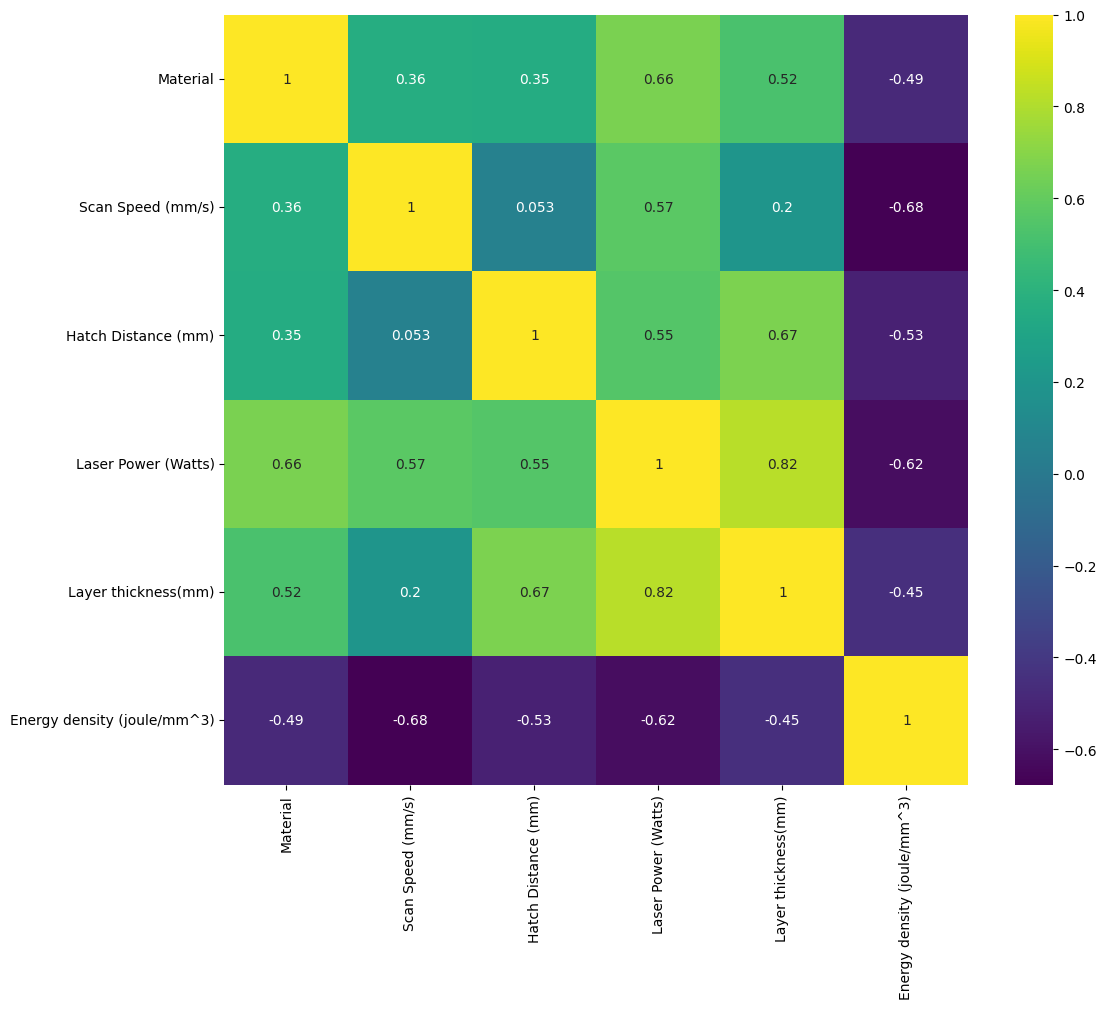

In [ ]:
import seaborn as sns
#Using Pearson Correlation
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
plt.figure(figsize=(12,10))
#normalizeddf_train = Normalizer().fit_transform(x_train)

cor = pd.DataFrame(x_train).corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.viridis)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
skf = StratifiedKFold(n_splits=5)
for train_ind, text_ind in skf.split()
#StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
#pd.DataFrame(x_train)

SyntaxError: expected ':' (<ipython-input-18-87296436edbf>, line 3)

In [ ]:
pd.DataFrame(x_test)

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
162,0,250,0.11,100,0.05,72.73
174,0,111,0.12,100,0.05,150.15
234,0,750,0.12,150,0.03,55.56
66,1,1150,0.12,340,0.06,41.06
161,0,250,0.11,100,0.05,72.73
...,...,...,...,...,...,...
180,0,1700,0.06,100,0.02,49.02
229,0,446,0.14,150,0.03,80.08
14,1,950,0.12,370,0.06,54.09
62,1,1100,0.11,320,0.06,44.08


In [ ]:
y_test

In [ ]:
y_train

##MODEL TESTING

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error


In [ ]:
models= {"decision tree": DecisionTreeRegressor(), "random forest": RandomForestRegressor(), "Extra tree low var": ExtraTreesRegressor()}

for i in range(0,len(models)):
    model = list(models.values())[i]
    model.fit(input, y_train)

    #prediction
    y_train_predict=model.predict(input)
    y_test_predict=model.predict(input_test)

    #training set performance
    #train_accuracy=accuracy_score(y_train,y_train_predict)
    train_r2=r2_score(y_train,y_train_predict)
    train_meanr2= mean_squared_error(y_train,y_train_predict)

    #testing set performance
    #test_accuracy=accuracy_score(y_test,y_test_predict)
    test_r2=r2_score(y_test,y_test_predict)
    test_meanr2= mean_squared_error(y_test,y_test_predict)


    print((list(models.keys())[i]))

    print("training set performance")
    #print(f'training accuracy: {train_accuracy}')
    print(f'training r^2: {train_r2}')
    print(f'training mean squared error: {train_meanr2}')

    print("____________________________")

    print("testing set performance")
    #print(f'testing accuracy: {test_accuracy}')
    print(f'testing r^2: {test_r2}')
    print(f'testing mean squared error: {test_meanr2}')

    print("-------------------------------")









decision tree
training set performance
training r^2: 0.9999551257140142
training mean squared error: 0.0003045138888888883
____________________________
testing set performance
testing r^2: 0.9994188714945641
testing mean squared error: 0.0039738749999999904
-------------------------------
random forest
training set performance
training r^2: 0.9998620083103475
training mean squared error: 0.000936402332145426
____________________________
testing set performance
testing r^2: 0.9993357742106759
testing mean squared error: 0.004542111140410245
-------------------------------
Extra tree low var
training set performance
training r^2: 0.99995512560211
training mean squared error: 0.00030451464826388835
____________________________
testing set performance
testing r^2: 0.9994632316026504
testing mean squared error: 0.0036705315520832575
-------------------------------


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, input_train, output, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [-0.1146452  -1.18193936 -0.65653618  0.99995077  0.45375894 -0.15793279
  0.56956173 -0.06605175 -0.13936553 -0.87389124]
Average CV Score:  -0.1167090607322638
Number of CV Scores used in Average:  10


In [ ]:
import joblib
from google.colab import files
my_model = model
model_filename = "/content/density_prediction.joblib"

joblib.dump(my_model,'density_prediction.joblib')
print(model.feature_names_in_)

NameError: name 'model' is not defined

#Prediction

In [ ]:
df1 = pd.read_csv("/content/3d priniting csv.csv")
cols1 = df.keys()
df1 = df1[cols1]
df1

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3),Density
0,Al-50Si,950.00,0.11,330.0,0.06,52.63,2.44
1,Al-50Si,950.00,0.15,340.0,0.06,39.77,2.48
2,Al-50Si,1150.00,0.11,350.0,0.06,46.11,2.47
3,Al-50Si,1250.00,0.12,350.0,0.06,38.89,2.47
4,Al-50Si,1350.00,0.13,350.0,0.06,33.24,2.46
...,...,...,...,...,...,...,...
312,316L,21.44,0.04,125.0,0.35,416.44,7.81
313,316L,18.76,0.04,175.0,0.40,583.02,7.84
314,316L,26.28,0.06,175.0,0.46,241.27,7.94
315,316L,21.44,0.06,125.0,0.35,277.63,7.95


In [ ]:
p_test_output= df1['Density']


In [ ]:
p_input1=df1.drop(['Density', 'Scan Speed (mm/s)','Laser Power (Watts)', 'Energy density (joule/mm^3)' ], axis=1)
p_input1

,Material,Hatch Distance (mm),Layer thickness(mm)
0,Al-50Si,0.11,0.06
1,Al-50Si,0.15,0.06
2,Al-50Si,0.11,0.06
3,Al-50Si,0.12,0.06
4,Al-50Si,0.13,0.06
...,...,...,...
312,316L,0.04,0.35
313,316L,0.04,0.40
314,316L,0.06,0.46
315,316L,0.06,0.35


In [ ]:
p_input2= df1.drop(['Density', "Hatch Distance (mm)","Layer thickness(mm)","Material"], axis=1)
p_input2


,Scan Speed (mm/s),Laser Power (Watts),Energy density (joule/mm^3)
0,950.00,330.0,52.63
1,950.00,340.0,39.77
2,1150.00,350.0,46.11
3,1250.00,350.0,38.89
4,1350.00,350.0,33.24
...,...,...,...
312,21.44,125.0,416.44
313,18.76,175.0,583.02
314,26.28,175.0,241.27
315,21.44,125.0,277.63


normalise test data

In [ ]:

p_input2['Scan Speed (mm/s)'] = p_input2['Scan Speed (mm/s)'].apply((lambda x: (x - min["min scan speed"]) / (max["max scan speed"]-min["min scan speed"])))
p_input2['Laser Power (Watts)'] = p_input2['Laser Power (Watts)'].apply((lambda x: (x - min["min laser power"]) / (max["max laser power"]-min["min laser power"])))
p_input2['Energy density (joule/mm^3)'] = p_input2['Energy density (joule/mm^3)'].apply(lambda x: (x - min["min energy density"]) / (max["max energy density"]-min["min energy density"]))
p_input2

p_input2



,Scan Speed (mm/s),Laser Power (Watts),Energy density (joule/mm^3)
0,0.444150,0.866667,0.110712
1,0.444150,0.900000,0.059918
2,0.550026,0.933333,0.084959
3,0.602965,0.933333,0.056442
4,0.655903,0.933333,0.034126
...,...,...,...
312,-0.047411,0.183333,1.547674
313,-0.048830,0.350000,2.205624
314,-0.044849,0.350000,0.855794
315,-0.047411,0.183333,0.999408


In [ ]:
p_test_input = pd.concat([p_input1,p_input2], axis=1)
p_test_input = p_test_input[cols]
p_test_input

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
0,Al-50Si,0.444150,0.11,0.866667,0.06,0.110712
1,Al-50Si,0.444150,0.15,0.900000,0.06,0.059918
2,Al-50Si,0.550026,0.11,0.933333,0.06,0.084959
3,Al-50Si,0.602965,0.12,0.933333,0.06,0.056442
4,Al-50Si,0.655903,0.13,0.933333,0.06,0.034126
...,...,...,...,...,...,...
312,316L,-0.047411,0.04,0.183333,0.35,1.547674
313,316L,-0.048830,0.04,0.350000,0.40,2.205624
314,316L,-0.044849,0.06,0.350000,0.46,0.855794
315,316L,-0.047411,0.06,0.183333,0.35,0.999408


according to the latest dataset, al= 1, 316l=0 and in=2

In [ ]:
p_test_input['Material'] = p_test_input['Material'].replace(['Al-50Si'],1 )
p_test_input['Material'] = p_test_input['Material'].replace(['IN-718'],2 )
p_test_input['Material'] = p_test_input['Material'].replace(['316L'],0 )
p_test_input

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3)
0,1,0.444150,0.11,0.866667,0.06,0.110712
1,1,0.444150,0.15,0.900000,0.06,0.059918
2,1,0.550026,0.11,0.933333,0.06,0.084959
3,1,0.602965,0.12,0.933333,0.06,0.056442
4,1,0.655903,0.13,0.933333,0.06,0.034126
...,...,...,...,...,...,...
312,0,-0.047411,0.04,0.183333,0.35,1.547674
313,0,-0.048830,0.04,0.350000,0.40,2.205624
314,0,-0.044849,0.06,0.350000,0.46,0.855794
315,0,-0.047411,0.06,0.183333,0.35,0.999408


In [ ]:
y_preds= model.predict(p_test_input)
y_preds

array([2.4592    , 2.48      , 2.47      , 2.47      , 2.46      ,
       2.46      , 2.46      , 2.4667    , 2.4699    , 2.45      ,
       2.4589    , 2.46      , 2.46      , 2.48      , 2.4486    ,
       2.44      , 2.48      , 2.43      , 2.45      , 2.46      ,
       2.46      , 2.39      , 2.47      , 2.45      , 2.45      ,
       2.46      , 2.46      , 2.38      , 2.4697    , 2.47      ,
       2.47      , 2.46      , 2.4675    , 2.45      , 2.4424    ,
       2.45      , 2.46      , 2.46      , 2.47      , 2.39      ,
       2.4642    , 2.47      , 2.44      , 2.47      , 2.4435    ,
       2.47      , 2.47      , 2.47      , 2.46      , 2.47      ,
       2.47      , 2.47      , 2.46      , 2.47      , 2.47      ,
       2.46      , 2.48      , 2.46      , 2.49      , 2.4566    ,
       2.48      , 2.45      , 2.4547    , 2.43      , 2.4553    ,
       2.46      , 2.4732    , 2.48      , 2.48      , 2.47      ,
       2.461     , 2.42      , 2.48      , 2.4704    , 2.48   

In [ ]:
import numpy as np
np.array(p_test_output)

array([2.44 , 2.48 , 2.47 , 2.47 , 2.46 , 2.46 , 2.46 , 2.46 , 2.45 ,
       2.45 , 2.46 , 2.46 , 2.46 , 2.48 , 2.47 , 2.44 , 2.48 , 2.43 ,
       2.45 , 2.46 , 2.46 , 2.39 , 2.47 , 2.45 , 2.45 , 2.46 , 2.46 ,
       2.38 , 2.42 , 2.47 , 2.47 , 2.46 , 2.48 , 2.45 , 2.41 , 2.45 ,
       2.46 , 2.46 , 2.47 , 2.39 , 2.46 , 2.47 , 2.44 , 2.47 , 2.46 ,
       2.47 , 2.47 , 2.47 , 2.46 , 2.47 , 2.47 , 2.47 , 2.46 , 2.47 ,
       2.47 , 2.46 , 2.48 , 2.46 , 2.49 , 2.48 , 2.48 , 2.45 , 2.48 ,
       2.43 , 2.47 , 2.46 , 2.42 , 2.48 , 2.48 , 2.47 , 2.47 , 2.42 ,
       2.48 , 2.47 , 2.48 , 2.47 , 2.47 , 2.46 , 2.47 , 2.47 , 8.159,
       8.158, 8.149, 8.149, 8.137, 8.163, 8.161, 8.181, 8.139, 8.164,
       8.149, 8.152, 8.157, 8.14 , 8.113, 8.185, 8.177, 8.184, 8.122,
       8.081, 8.172, 8.165, 8.13 , 8.151, 8.098, 8.163, 8.196, 8.181,
       8.178, 8.164, 8.152, 8.181, 8.187, 8.16 , 8.166, 8.157, 8.171,
       8.17 , 8.177, 8.161, 8.181, 8.18 , 8.165, 8.168, 8.169, 8.171,
       8.157, 8.166,

In [ ]:
error = np.abs(y_preds-p_test_output)
avg = np.mean(error)
var = np.var(error)

avg, var

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(Predicted Density   NaN
 0                   NaN
 1                   NaN
 2                   NaN
 3                   NaN
                      ..
 312                 NaN
 313                 NaN
 314                 NaN
 315                 NaN
 316                 NaN
 Length: 318, dtype: float64,
 Predicted Density   NaN
 0                   NaN
 1                   NaN
 2                   NaN
 3                   NaN
                      ..
 312                 NaN
 313                 NaN
 314                 NaN
 315                 NaN
 316                 NaN
 Length: 318, dtype: float64)

In [ ]:
min, max

({'min scan speed': 18.76,
  'min laser power': 70.0,
  'min energy density': 24.6},
 {'max scan speed': 2000.0,
  'max laser power': 370.0,
  'max energy density': 1166.04})

In [ ]:
y_preds=pd.DataFrame(y_preds, columns=["Predicted Density"])
y_preds

,Predicted Density
0,2.459200
1,2.480000
2,2.470000
3,2.470000
4,2.460000
...,...
312,6.299683
313,6.305883
314,6.316533
315,6.299683


In [ ]:
table=pd.concat([df1,y_preds], axis=1)
table

,Material,Scan Speed (mm/s),Hatch Distance (mm),Laser Power (Watts),Layer thickness(mm),Energy density (joule/mm^3),Density,Predicted Density
0,Al-50Si,950.00,0.11,330.0,0.06,52.63,2.44,2.459200
1,Al-50Si,950.00,0.15,340.0,0.06,39.77,2.48,2.480000
2,Al-50Si,1150.00,0.11,350.0,0.06,46.11,2.47,2.470000
3,Al-50Si,1250.00,0.12,350.0,0.06,38.89,2.47,2.470000
4,Al-50Si,1350.00,0.13,350.0,0.06,33.24,2.46,2.460000
...,...,...,...,...,...,...,...,...
312,316L,21.44,0.04,125.0,0.35,416.44,7.81,6.299683
313,316L,18.76,0.04,175.0,0.40,583.02,7.84,6.305883
314,316L,26.28,0.06,175.0,0.46,241.27,7.94,6.316533
315,316L,21.44,0.06,125.0,0.35,277.63,7.95,6.299683


In [ ]:
table.to_excel('/content/Predicted_density.xlsx', index=False)
#from google.colab import files
#files.download('/content/Predicted_aluminium.csv')